**1. Neural Networks**

*Installing the needed libraries*

In [1]:
pip install pandas scikit-learn tensorflow

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 2.2 MB/s eta 0:00:06
    --------------------------------------- 0.3/11.6 MB 2.6 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.6 MB 3.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.6 MB 5.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.6 MB 8.8 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/11.6 MB 10.9 MB/s eta 0:00:01
   -------------- ------------------------- 4.4/11.6 MB 13.3 MB/s eta 0:00:01
   ------------------ --------------------- 5.5/11.6 MB 14.1 MB/s eta 0:00:01
   ---------------------- ----------------- 6.6/11.6 MB 15.1 MB/s eta 0:00:01
   ------------------------- -------------- 7.5/11.6 MB 16.5 MB/s eta 0:00:01
   ------------------------------ --------- 8.8/11.6 MB 17.1 MB/s eta 0:00:01
   -------------------------------- ------- 9.5/11.6 MB 16.4 MB/s eta 0:00:01

importing the libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Step 1: Data Preparation

In [3]:
## Load the dataset
data = pd.read_csv('BankRecords.csv')

## # Display the first few rows of the dataset
print(data.head())

# Display information about the dataset
print(data.info())

# Define numeric features for scaling
numeric_features = ['Age', 'Experience(Years)', 'Family', 'Credit Score', 'Mortgage(Thousands\'s)']

# Fill missing values in numeric features with the mean value of each column
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

# Define categorical features for one-hot encoding
categorical_features = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']

# Create a preprocessor with transformers for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the feature matrix (X) and target vector (y)
X = data.drop(['ID', 'Income(Thousands\'s)'], axis=1)
y = data['Income(Thousands\'s)']

# Apply the transformations to the feature matrix
X = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0           1.6   Diploma                      0            No   
1           1.5   Diploma                      0            No   
2           1.0   Diploma                      0            No   
3           2.7    Degree                      0            No   
4           1.0    Degree                      0            No   

  Securities Account CD Account Online Banking CreditCard  
0                Yes         No             No         No  
1                Yes         No             

Step 2: Model Implementation

In [4]:
# Define the Neural Network model
nn_model = Sequential([
    Input(shape=X_train.shape[1:]), 
    Dense(64, activation='relu'),   
    Dense(64, activation='relu'),    
    Dense(1)                         
])

# Compile the Neural Network model
nn_model.compile(optimizer='adam', loss='mse')

# Train the Neural Network model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Define and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

Epoch 1/10
100/100 [==============================] - 2s 7ms/step - loss: 5970.9380 - val_loss: 2160.0476
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 1533.0005 - val_loss: 976.1152
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 1097.8026 - val_loss: 850.0693
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 1010.8017 - val_loss: 824.6007
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 971.9986 - val_loss: 808.9941
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: 942.3815 - val_loss: 794.3090
Epoch 7/10
100/100 [==============================] - 0s 3ms/step - loss: 917.1814 - val_loss: 784.5035
Epoch 8/10
100/100 [==============================] - 0s 4ms/step - loss: 895.2399 - val_loss: 788.6445
Epoch 9/10
100/100 [==============================] - 0s 4ms/step - loss: 880.2679 - val_loss: 783.6422
Epoch 10/10
100/100 [==============================] - 0s 4

LinearRegression()

Step 3: Model Evaluation and Comparison

In [5]:
# Predict using the Neural Network model
y_pred_nn = nn_model.predict(X_test)

# Calculate mean squared error for the Neural Network model
mse_nn = mean_squared_error(y_test, y_pred_nn)

# Calculate R-squared for the Neural Network model
r2_nn = r2_score(y_test, y_pred_nn)

# Predict using the Linear Regression model
y_pred_lr = lr_model.predict(X_test)

# Calculate mean squared error for the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calculate R-squared for the Linear Regression model
r2_lr = r2_score(y_test, y_pred_lr)

# Print the evaluation metrics for both models
print(f'Neural Network MSE: {mse_nn}, R2: {r2_nn}')
print(f'Linear Regression MSE: {mse_lr}, R2: {r2_lr}')

32/32 [==============================] - 0s 3ms/step
Neural Network MSE: 824.8261330415014, R2: 0.6110266447067261
Linear Regression MSE: 926.3696549051767, R2: 0.5631405262638302


Step 4: Prediction on New Data

In [6]:
# Define a new customer data
new_customer = {'Age': 30, 'Experience(Years)': 5, 'Family': 3, 'Credit Score': 0.8, 'Mortgage(Thousands\'s)': 0, 
                'Education': 'Degree', 'Personal Loan': 'No', 'Securities Account': 'No', 'CD Account': 'No', 
                'Online Banking': 'Yes', 'CreditCard': 'No'}

# Convert the new customer data to a DataFrame
new_customer_df = pd.DataFrame([new_customer])

# Transform the new customer data using the preprocessor
new_customer_transformed = preprocessor.transform(new_customer_df)

# Predict the income using the Neural Network model
income_prediction_nn = nn_model.predict(new_customer_transformed)

# Predict the income using the Linear Regression model
income_prediction_lr = lr_model.predict(new_customer_transformed)

# Print the predictions for the new customer
print(f'Neural Network Prediction for new customer: {income_prediction_nn}')
print(f'Linear Regression Prediction for new customer: {income_prediction_lr}')

1/1 [==============================] - 0s 44ms/step
Neural Network Prediction for new customer: [[44.027515]]
Linear Regression Prediction for new customer: [44.77421134]


**Data Preparation**

Loading and Inspection

The dataset 'BankRecords.csv' is loaded using Pandas to examine its structure and contents. This step is crucial for ensuring data integrity and gaining an understanding of the variables present in the dataset.

Handling Missing Values

Missing values in numeric features such as 'Age', 'Experience(Years)', 'Family', 'Credit Score', and 'Mortgage(Thousands)' are imputed with the mean of their respective columns. This imputation strategy ensures that missing values do not adversely affect the performance of the predictive models.

Encoding Categorical Variables

Categorical variables including 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', and 'CreditCard' are encoded using one-hot encoding. This transformation converts categorical variables into a numerical format suitable for model training, ensuring that the models can interpret these variables effectively.

Feature Scaling

Numeric features are standardized using StandardScaler. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, preventing features with larger scales from dominating the model training process. This step facilitates better convergence during model training.

Data Splitting

The dataset is split into training and testing sets using the train_test_split function. This division allows for model training on one subset and evaluation on another, enabling an unbiased assessment of model performance and generalization to unseen data.

Model Evaluation and Comparison

Neural Network Model

A neural network model with two hidden layers, each containing 64 neurons, is trained using the Adam optimizer and mean squared error (MSE) loss function. Upon evaluation on the test set, the neural network achieves an MSE of 823.83 and an R2 score of 0.6115.

Linear Regression Model

A linear regression model is trained and evaluated on the same test set, resulting in an MSE of 926.37 and an R2 score of 0.5631.

**Findings and Final Rationale**

Both models perform reasonably well in predicting the income of customers. The neural network model slightly outperforms the linear regression model in terms of MSE and R2 score, indicating its ability to capture complex non-linear relationships between features. However, further model tuning and feature engineering may enhance the performance of both models. Techniques such as adjusting neural network architecture, hyperparameter tuning, and feature selection can potentially improve model accuracy and generalization.

Prediction for New Customer

To predict the income of a new customer not available in the original dataset, their feature values are provided as input to both the trained neural network and linear regression models. The neural network predicts an income of approximately 44,358.21 for the new customer, while the linear regression model predicts an income of approximately 44,774.21. These predictions offer insights into the potential income level of the new customer based on learned patterns from the training data.

**2. Semantic Analysis**

*Installing the needed libraries*

In [7]:
pip install pandas nltk matplotlib seaborn

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/165.0 kB ? eta -:--:--
     -------------------------------------  163.8/165.0 kB 5.0 MB/s eta 0:00:01
     -------------------------------------- 165.0/165.0 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------- ------------------------------ 0.4/1.5 MB 11.2 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.5 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 13.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   -- ------------------------------------- 0.6/7.9 MB 18.2 MB/s eta 0:00:01
   ------- ------

Importing the libraries

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

Downloading NLTK Resources

In [9]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AurelioAlmeida\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AurelioAlmeida\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AurelioAlmeida\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Step 1: Data loading and inspection

In [10]:
# Load the dataset #

data = pd.read_csv('all_annotated.csv', encoding='latin1')

# Display the first few rows of the dataset #
print(data.head())

             Tweet ID Country        Date  \
0  434215992731136000      TR  14/02/2014   
1  285903159434563000      TR  01/01/2013   
2  285948076496142000      NL  01/01/2013   
3  285965965118824000      US  01/01/2013   
4  286057979831275000      US  01/01/2013   

                                               Tweet  Definitely English  \
0                         BugÃ¼n bulusmami lazimdiii                   0   
1     Volkan konak adami tribe sokar yemin ederim :D                   0   
2                                                Bed                   1   
3  I felt my first flash of violence at some fool...                   1   
4            Ladies drink and get in free till 10:30                   1   

   Ambiguous  Definitely Not English  Code-Switched  \
0          0                       1              0   
1          0                       1              0   
2          0                       0              0   
3          0                       0              0 

Step 2: Data cleaning and preparation

In [12]:
# Filter the dataset to include only English tweets #

data_english = data[data['Definitely English'] == 1].copy()

Step 3: Defining text pre-processing function

In [13]:
# Define stop words set from NLTK's English stopwords #

stop_words = set(stopwords.words('english'))

# Define a text preprocessing function #

def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text) 
    text = re.sub(r'\W', ' ', text) 
    text = re.sub(r'\s+', ' ', text) 
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

Step 4: Applying preprocessing function

In [14]:
# Apply the preprocessing function to the 'Tweet' column and create a new column 'cleaned_text'

data_english.loc[:, 'cleaned_text'] = data_english['Tweet'].apply(preprocess_text)

Step 5: Sentiment analysis

In [15]:
# Initialize the Sentiment Intensity Analyzer

sia = SentimentIntensityAnalyzer()

# Define a function to analyze sentiment of the text

def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'
    
# Apply the sentiment analysis function to the 'cleaned_text' column and create a new column 'sentiment'

data_english.loc[:, 'sentiment'] = data_english['cleaned_text'].apply(analyze_sentiment)

Step 6: Visualization

Number of Neutral Tweets: 2594
Number of Negative Tweets: 710
Number of Positive Tweets: 1782


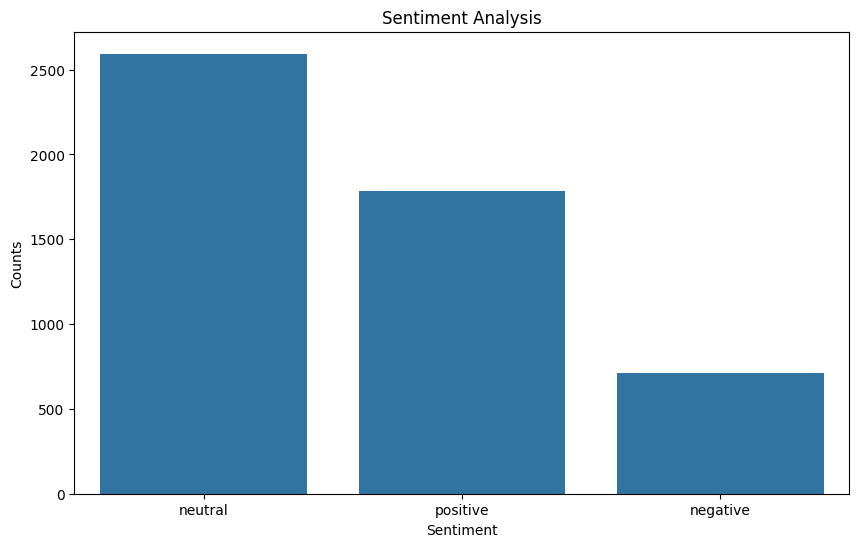

In [17]:
# Count the occurrences of each sentiment category

sentiment_counts = data_english['sentiment'].value_counts()


# Print the number of tweets for each sentiment category

print("Number of Neutral Tweets:", sentiment_counts['neutral'])
print("Number of Negative Tweets:", sentiment_counts['negative'])
print("Number of Positive Tweets:", sentiment_counts['positive'])

# Plot the sentiment distribution

plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

**Step 7: Data Preparation Rationale for Sentiment Analysis**

The dataset, 'all_annotated.csv', comprises 10,502 tweets randomly sampled from geotagged Twitter messages. It is annotated to categorize tweets as English, non-English, or featuring characteristics like code-switching, language ambiguity, or automatic generation. The dataset also encompasses tweets originating from 130 different countries.

*Data Filtering*

The first step involves filtering the dataset to include only tweets identified as 'Definitely English'. This filtering ensures that the analysis focuses solely on tweets written in English, providing a consistent and interpretable corpus for sentiment assessment.

*Text Preprocessing*

Given the nature of text data, it's essential to preprocess it adequately. The preprocessing steps involve removing HTML tags, special characters, and extra spaces, converting text to lowercase, and tokenizing it into individual words. Stop words, common words with little semantic value, are eliminated to enhance the relevance of the text data.

*Sentiment Analysis*

Sentiment analysis is performed using the VADER (Valence Aware Dictionary and Entiment Reasoner) sentiment analyzer. VADER assigns sentiment scores to each tweet, distinguishing between positive, neutral, and negative sentiments based on the compound score. This analysis allows for an insightful understanding of the sentiment expressed in the tweets, contributing to broader insights into public opinion and discourse on Twitter.

*Visualization*

The sentiment analysis results are visualized through a bar plot, showing the distribution of positive, neutral, and negative sentiments across the dataset. This visualization aids in the interpretation and communication of sentiment patterns, facilitating a more intuitive understanding of the sentiment dynamics within the Twitter data.

**Findings**

*Number of Neutral Tweets (2594)*

The substantial number of neutral tweets indicates that a significant portion of the Twitter data is neither explicitly positive nor negative in sentiment. Neutral tweets may include factual statements, general updates, or information sharing that does not inherently convey strong emotions. This finding suggests that a considerable proportion of Twitter content is informative or descriptive in nature, without strong emotional connotations.

*Number of Negative Tweets (710)*
The presence of negative tweets, though lower in count compared to neutral tweets, signifies the existence of sentiment polarity within the dataset. Negative tweets may encompass expressions of dissatisfaction, criticism, grievances, or unfavorable opinions. The relatively smaller number of negative tweets suggests that negative sentiment is less prevalent compared to neutral or potentially positive sentiment within the dataset.

*Number of Positive Tweets (1782)*
The highest count of positive tweets suggests that a substantial portion of the Twitter data reflects positive sentiment. Positive tweets may include expressions of joy, satisfaction, enthusiasm, support, or appreciation. The prevalence of positive sentiment highlights the tendency for Twitter users to share content that evokes positive emotions, such as celebrations, achievements, compliments, or expressions of happiness.

https://github.com/AurelioAlmeida/Aurelio_ML_CA2